In [1]:
import tensorflow as tf
import os
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import TensorBoard
import datetime


In [4]:
# Create a TensorBoard callback
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")  # Adjust the log directory as needed
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [5]:
TRAINING_DIR = '/2108107010026_WildaFahera/glasses_noGlasses/train'
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split=0.4)
  # Normalize pixel values between 0 and 1

# Load training data
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=10,
    class_mode='binary'
    )

        
VALIDATION_DIR = '/2108107010026_WildaFahera/glasses_noGlasses/valid'
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Normalize pixel values between 0 and 1

# Load validation data
validation_generator = validation_datagen.flow_from_directory(
VALIDATION_DIR,
target_size=(150, 150),  # Resize images to 150x150
batch_size=10,
class_mode='binary')

Found 786 images belonging to 2 classes.
Found 218 images belonging to 2 classes.


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
model.summary()

# Menghitung jumlah hidden layer
hidden_layers = [layer for layer in model.layers if isinstance(layer, (tf.keras.layers.Conv2D, tf.keras.layers.Dense))]
print("Jumlah Hidden layer:", len(hidden_layers) - 1)  # Mengurangkan 1 karena output layer tidak dihitung sebagai hidden layer

# Menghitung total hidden nodes
total_hidden_nodes = sum([layer.output_shape[1] for layer in hidden_layers[:-1]])  # Mengurangkan output layer
print("Jumlah total Hidden node:", total_hidden_nodes)

# Menghitung total weights
total_weights = sum([layer.count_params() for layer in model.layers])
print("Jumlah total bobot (weight):", total_weights)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [8]:
# Compile a Model
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])   

# Train the model
history = model.fit(
    train_generator,
    epochs=15,
    verbose=1,
    validation_data=validation_generator,
    callbacks=[tensorboard_callback]
    )

Epoch 1/15


79/79 [==============================] - 13s 148ms/step - loss: 0.4586 - accuracy: 0.7875 - val_loss: 0.5193 - val_accuracy: 0.8394
Epoch 2/15
79/79 [==============================] - 11s 141ms/step - loss: 0.2337 - accuracy: 0.9249 - val_loss: 0.1638 - val_accuracy: 0.9450
Epoch 3/15
79/79 [==============================] - 11s 139ms/step - loss: 0.1027 - accuracy: 0.9707 - val_loss: 0.0674 - val_accuracy: 0.9862
Epoch 4/15
79/79 [==============================] - 11s 138ms/step - loss: 0.0788 - accuracy: 0.9733 - val_loss: 0.0583 - val_accuracy: 0.9771
Epoch 5/15
79/79 [==============================] - 11s 138ms/step - loss: 0.0483 - accuracy: 0.9835 - val_loss: 0.0874 - val_accuracy: 0.9771
Epoch 6/15
79/79 [==============================] - 11s 140ms/step - loss: 0.0552 - accuracy: 0.9784 - val_loss: 0.0623 - val_accuracy: 0.9771
Epoch 7/15
79/79 [==============================] - 11s 141ms/step - loss: 0.0479 - accuracy: 0.9847 - val_loss: 0.0594 - val_accuracy: 0.98

In [9]:
# Save the model to a file
model.save('model_glassesNoGlasses.h5')

c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
# Load the saved model
load_model = tf.keras.models.load_model('model_glassesNoGlasses.h5')

In [11]:

# Evaluate the loaded model with test data
test_loss, test_acc = load_model.evaluate(validation_generator)
print(f'Test accuracy: {test_acc}')

22/22 [==============================] - 1s 31ms/step - loss: 0.0673 - accuracy: 0.9771
Test accuracy: 0.9770641922950745


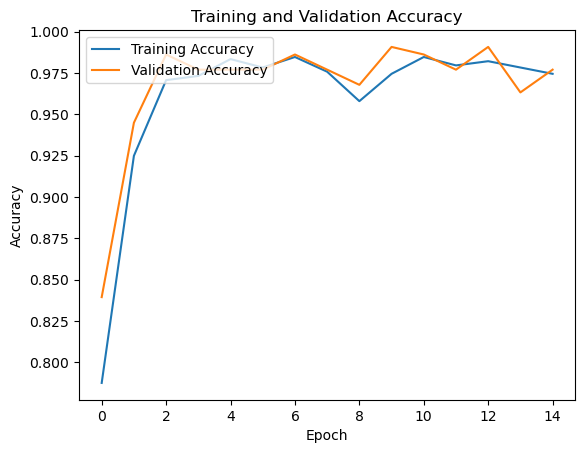

In [12]:
import matplotlib.pyplot as plt

# Retrieve a list of list results on training and test data sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot training and validation accuracy per epoch
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Specify the directory and filename for saving the plot
save_dir = '/2108107010026_WildaFahera'  # Change to your desired directory
save_filename = 'train_test_plot_glassesNoGlasses.png'  # Change to your desired filename

# Save the plot to the specified directory and filename
plt.savefig(os.path.join(save_dir, save_filename))

# Display the plot (optional)
plt.show()


In [17]:
from keras.preprocessing import image
from keras.models import load_model
import numpy as np

# Load your trained model (ensure the path is correct)
model_path = '/2108107010026_WildaFahera/model_glassesNoGlasses.h5'
loaded_model = load_model(model_path)

def predict_image_class(image_path, model):
    img = image.load_img(image_path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    classes = model.predict(x)
    return classes[0][0]

def upload_and_predict():
    image_path = input("Enter the file path of the image: ")
    confidence = predict_image_class(image_path, loaded_model)
    if confidence > 0.5:
        print("The image is predicted as an no glasses.")
    else:
        print("The image is predicted as a with glasses.")

# Perform the image upload and prediction
upload_and_predict()


1/1 [==============================] - 0s 81ms/step
The image is predicted as a with glasses.


In [19]:
%load_ext tensorboard
%tensorboard --logdir=./logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6009 (pid 6780), started 0:00:13 ago. (Use '!kill 6780' to kill it.)